In [98]:
import pandas as pd
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, datetime, date

In [99]:
data_file = "csv_files/btc.csv"

In [100]:
data_file_pd = pd.read_csv(data_file, delimiter = "\t")
data_file_pd.head()

,Unnamed: 0,CC_ID,price_close,price_high,price_low,price_open,time_period_end,time_period_start,trades_count,volume_traded,name
0,0,1,536.95,542.87,525.49,532.37,2016-06-02T00:00:00.0000000Z,2016-06-01T00:00:00.0000000Z,4433,5456.942657,BTC
1,1,2,538.00,540.00,529.13,536.95,2016-06-03T00:00:00.0000000Z,2016-06-02T00:00:00.0000000Z,3533,3939.351328,BTC
2,2,3,569.94,578.37,535.74,538.00,2016-06-04T00:00:00.0000000Z,2016-06-03T00:00:00.0000000Z,6192,8801.774635,BTC
3,3,4,573.80,588.71,558.54,569.93,2016-06-05T00:00:00.0000000Z,2016-06-04T00:00:00.0000000Z,4131,6216.627193,BTC
4,4,5,573.91,582.00,566.00,573.50,2016-06-06T00:00:00.0000000Z,2016-06-05T00:00:00.0000000Z,3347,5415.934694,BTC


In [101]:
ml_eth_pd = data_file_pd[['time_period_end','price_open', 'price_close']]
ml_eth_pd.head()

,time_period_end,price_open,price_close
0,2016-06-02T00:00:00.0000000Z,532.37,536.95
1,2016-06-03T00:00:00.0000000Z,536.95,538.00
2,2016-06-04T00:00:00.0000000Z,538.00,569.94
3,2016-06-05T00:00:00.0000000Z,569.93,573.80
4,2016-06-06T00:00:00.0000000Z,573.50,573.91


In [102]:
def convert_index_to_datetimeindex(df):
    # converting the dates to DateTimeIndex
    index = ml_eth_pd.time_period_end
    ml_eth_pd.index = pd.to_datetime(index, dayfirst=True)
convert_index_to_datetimeindex(ml_eth_pd)
ml_eth_pd.head()

,time_period_end,price_open,price_close
time_period_end,,,
2016-06-02,2016-06-02T00:00:00.0000000Z,532.37,536.95
2016-06-03,2016-06-03T00:00:00.0000000Z,536.95,538.00
2016-06-04,2016-06-04T00:00:00.0000000Z,538.00,569.94
2016-06-05,2016-06-05T00:00:00.0000000Z,569.93,573.80
2016-06-06,2016-06-06T00:00:00.0000000Z,573.50,573.91


In [103]:
def convert_date_to_time_elapsed(df):
    dayCount = ml_eth_pd.index

    elapsed = dayCount - dayCount[0]
    ml_eth_pd['Days Elapsed'] = elapsed.days
    

convert_date_to_time_elapsed(ml_eth_pd)

ml_eth_pd.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,time_period_end,price_open,price_close,Days Elapsed
time_period_end,,,,
2016-06-02,2016-06-02T00:00:00.0000000Z,532.37,536.95,0
2016-06-03,2016-06-03T00:00:00.0000000Z,536.95,538.00,1
2016-06-04,2016-06-04T00:00:00.0000000Z,538.00,569.94,2
2016-06-05,2016-06-05T00:00:00.0000000Z,569.93,573.80,3
2016-06-06,2016-06-06T00:00:00.0000000Z,573.50,573.91,4


In [104]:
X = ml_eth_pd["Days Elapsed"].values.reshape(-1,1)
X.shape

(732, 1)

In [105]:
y = ml_eth_pd["price_close"]
y.shape

(732,)

In [106]:
param_grid = dict(n_estimators=[10, 25, 50, 100],
                  max_depth=[5, 10, 20, 30],
                  min_samples_leaf=[1,2,4])

In [107]:
from sklearn.externals import joblib
def rfr_fit_gscv(df, param_grid, filename):
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestRegressor

    # setting the static parameters
    rfr = RandomForestRegressor(bootstrap=True, random_state=0, n_jobs=2)

    grid = GridSearchCV(rfr, param_grid, cv=10,
                        scoring='neg_mean_squared_error')
    grid.fit(X,y)

    # this creates the pickled file.
    joblib.dump(grid, filename)  

    # These are all parameters of the learned model.
    # Notice the underscore at the end of the name of all the parameters.
    print("grid.cv_results_ {}".format(grid.cv_results_))
    print("--------------------------------------------")
    # The negative of the best_score_ value is taken
    # since the MSE is given as a negative value
    print("-grid.best_score_ {}".format(-grid.best_score_))
    print("grid.best_params_ {}".format(grid.best_params_))
    print("grid.best_estimator_ {}".format(grid.best_estimator_))  
    print("grid.n_splits_ {}".format(grid.n_splits_))  

param_grid = dict(n_estimators=[10, 25, 50, 100],
                  max_depth=[5, 10, 20, 30],
                  min_samples_leaf=[1,2,4])

%time rfr_fit_gscv(ml_eth_pd, param_grid, 'rfr_gscv_one_features20aug1404.pkl')

grid.cv_results_ {'mean_fit_time': array([0.13383827, 0.16870236, 0.21628594, 0.29127612, 0.13235185,
       0.16552622, 0.21864915, 0.29275289, 0.135726  , 0.16122265,
       0.20654664, 0.2581176 , 0.13706529, 0.16539781, 0.19993944,
       0.33301692, 0.13538036, 0.1591938 , 0.19663002, 0.29663889,
       0.13361771, 0.1643477 , 0.1962708 , 0.28409557, 0.13400428,
       0.1734978 , 0.19692583, 0.38329225, 0.14070525, 0.16726706,
       0.20549984, 0.27583988, 0.13460209, 0.16149981, 0.19682646,
       0.30049529, 0.13381128, 0.16536422, 0.21300697, 0.36774817,
       0.13454385, 0.16109331, 0.20376267, 0.27511775, 0.1403791 ,
       0.16869354, 0.23137753, 0.39775758]), 'std_fit_time': array([0.00609032, 0.01491347, 0.02657856, 0.04866137, 0.00476561,
       0.00589367, 0.02532281, 0.07137904, 0.00578913, 0.00420614,
       0.01467985, 0.0074028 , 0.01045534, 0.01274578, 0.01129807,
       0.08166193, 0.00790843, 0.00940815, 0.00778746, 0.06129285,
       0.0081464 , 0.01207425, 0.

In [108]:
def convert_date_to_days_elapsed(df, date):
    dates = ml_eth_pd.index
    elapsed = date - dates[0]
    return elapsed.days

def predict(df, date, filename):  
    """
    This function reloads the pickled file so predictions
    can be made without retraining the model.
    This runs very quickly compared to training the model.
    """
    grid = joblib.load(filename)
    days = convert_date_to_days_elapsed(ml_eth_pd, date)
    return grid.predict(days)

predict(ml_eth_pd, datetime(2016, 10, 19), 'rfr_gscv_one_features20aug1404.pkl')[0]

621.4390140143763

In [109]:
predict(ml_eth_pd, datetime(2019, 6, 6), 'rfr_gscv_one_features20aug1404.pkl')[0]

7829.684066945032

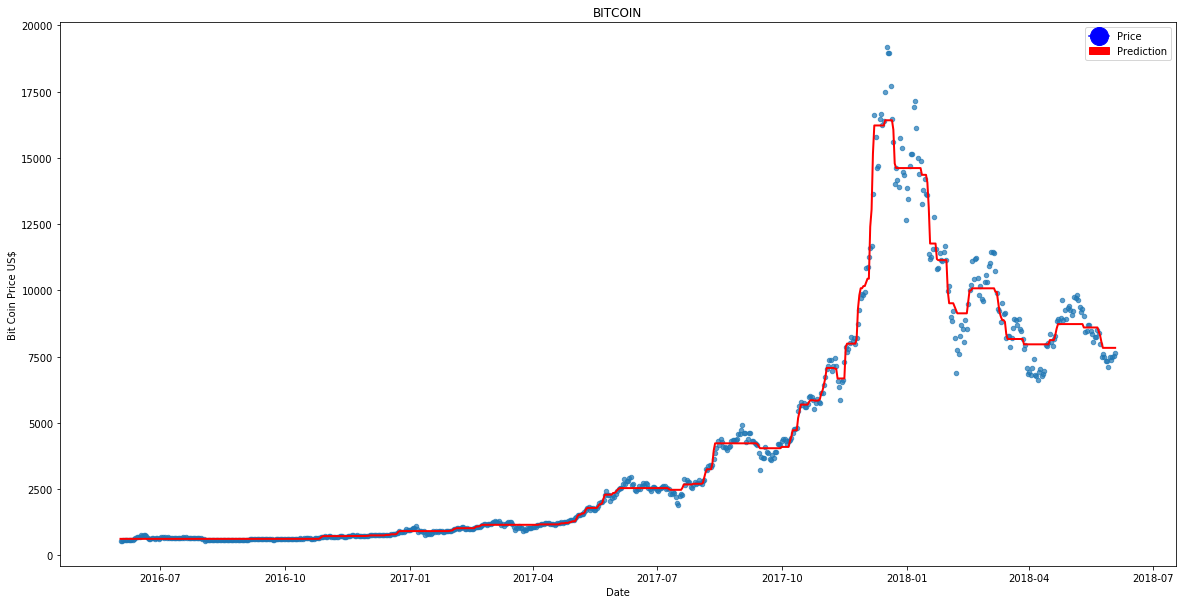

In [127]:
import matplotlib.lines as mlines
def rfr_viz(X,y,label):
    grid = joblib.load('rfr_gscv_one_features20aug1404.pkl')
    plt.figure(figsize = (20,10))

    plt.scatter(ml_eth_pd.index,y, s=20, alpha=0.7)
    plt.plot(ml_eth_pd.index, grid.predict(X), c='r', linewidth=2)

    plt.xlabel("Date")   
    plt.ylabel("Bit Coin Price US$")
    plt.title(label)
    plt.xticks
    red_line = mpatches.Patch(color='red', label='Prediction')   
    blue_dot = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=18, label='Price')
    plt.legend(handles=[blue_dot, red_line])


# X_train, grid.predict(X)     
rfr_viz(X,y, "BITCOIN")